#Mask detector
Congratulations! You have successfully made it to the technical team of Packages. The mall has a very strict policy on wearing masks due to the covid situation however it requires a lot of man power to regulate it. You believe that you can make this more efficient by making a mask detector. And if someone is spotted not wearing a mask you can just send that person there. 

We will be using the darketnet yolo written in c due its to very high performance relative to other yolos. Furthermore, this makes it really easy as the whole process is only a few commands long. The purpose of this project is to give you a hands on experience on yolo which will greatly aid you in your sproj or even in your daily life.

Online Resource:
https://medium.com/@manivannan_data/how-to-train-yolov3-to-detect-custom-objects-ccbcafeb13d2

Though there are other resources as well but the above link was the best.

##Dataset
You will not be given a dataset for this part. Instead you will be the one who will find the dataset and correctly annotate them. Please refer to the tutorial on how to annotate the dataset.

**Info On Dataset**

The following classes are required

1.   Person wearing a mask (About 50 images)
2.   Person not wearing a mask (About 50 images)

Annotation Resource:

https://medium.com/@manivannan_data/yolo-annotation-tool-new-18c7847a2186

Github Link For The Tool

https://github.com/ManivannanMurugavel/Yolo-Annotation-Tool-New-



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Getting yolo Ready
You do not have to do anything here

In [2]:
!git clone https://github.com/pjreddie/darknet.git
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5913, done.
remote: Total 5913 (delta 0), reused 0 (delta 0), pack-reused 5913
Receiving objects: 100% (5913/5913), 6.34 MiB | 32.14 MiB/s, done.
Resolving deltas: 100% (3919/3919), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:957:57: note: declared here
 extern __CUDA_DEPRECATE

In [3]:
!wget https://pjreddie.com/media/files/darknet53.weights

--2020-10-31 06:49:37--  https://pjreddie.com/media/files/darknet53.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166582580 (159M) [application/octet-stream]
Saving to: ‘darknet53.weights’

darknet53.weights   100%[===================>] 158.87M  7.45MB/s    in 28s     

2020-10-31 06:50:05 (5.62 MB/s) - ‘darknet53.weights’ saved [166582580/166582580]



In [4]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-10-31 06:50:05--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  2.91MB/s    in 61s     

2020-10-31 06:51:07 (3.85 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



###Preparing The Config Files

In [5]:
%%writefile cfg/mask-yolov3.cfg
[net]
# Testing
batch=64
subdivisions=2
# Training
batch=24
subdivisions=8
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filters=1024
size=3
stride=1
pad=1
activation=leaky

###########

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=21
activation=linear



[yolo]
mask = 3,4,5
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes=2
num=6
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1

[route]
layers = -4

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[upsample]
stride=2

[route]
layers = -1, 8

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=21
activation=linear

[yolo]
mask = 0,1,2
anchors = 10,14,  23,27,  37,58,  81,82,  135,169,  344,319
classes=2
num=6
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1

Writing cfg/mask-yolov3.cfg


In [6]:
!unzip "/content/drive/My Drive/Colab Notebooks/CV_PA1/Images.zip" -d "/content/darknet"

Archive:  /content/drive/My Drive/Colab Notebooks/CV_PA1/Images.zip
  inflating: /content/darknet/images/000001.jpg  
  inflating: /content/darknet/images/000001.txt  
  inflating: /content/darknet/images/000002.jpg  
  inflating: /content/darknet/images/000002.txt  
  inflating: /content/darknet/images/000003.jpg  
  inflating: /content/darknet/images/000003.txt  
  inflating: /content/darknet/images/000004.jpg  
  inflating: /content/darknet/images/000004.txt  
  inflating: /content/darknet/images/000005.jpg  
  inflating: /content/darknet/images/000005.txt  
  inflating: /content/darknet/images/000006.jpg  
  inflating: /content/darknet/images/000006.txt  
  inflating: /content/darknet/images/000007.jpg  
  inflating: /content/darknet/images/000007.txt  
  inflating: /content/darknet/images/000008.jpg  
  inflating: /content/darknet/images/000008.txt  
  inflating: /content/darknet/images/000009.jpg  
  inflating: /content/darknet/images/000009.txt  
  inflating: /content/darknet/im

In [7]:
%%writefile cfg/mask-obj.data
classes= 2 
train  = mask-train.txt  
valid  = mask-test.txt  
names = cfg/mask-obj.names  
backup = backup/

Writing cfg/mask-obj.data


In [8]:
%%writefile cfg/mask-obj.names
Mask
noMask

Writing cfg/mask-obj.names


In [9]:
# Download darknet53.conv.74
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-10-31 06:51:08--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  2.82MB/s    in 47s     

2020-10-31 06:51:55 (3.30 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [10]:
def strip(infile, outfile):
  with open(infile) as f:
    with open(outfile, "w") as f1:
        for line in f:
                f1.write((line.replace('\n', '') + '\n')) 

strip('train.txt', 'mask-train.txt')
strip('test.txt', 'mask-test.txt')

!mkdir labels
!cp -r images/*.txt labels

In [11]:
!./darknet detector train cfg/mask-obj.data cfg/mask-yolov3.cfg darknet53.conv.74

mask-yolov3
layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 5

###Testing Few Images

In [14]:
!./darknet detector test cfg/mask-obj.data cfg/yolov3.cfg yolov3.weights images/maksssksksss99.jpg 

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

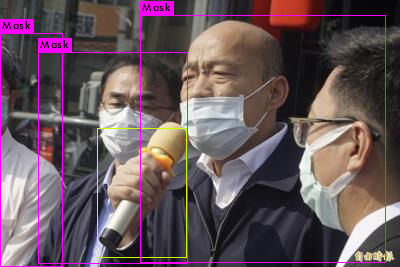

In [15]:
import PIL.Image
PIL.Image.open("predictions.jpg")